
# Estad√≠stica Inferencial  
**Dataset:** `insurance_claims.csv`
**Objetivo:** Entender la estructura estad√≠stica b√°sica de la siniestralidad antes de pasar a inferencia / modelado.



In [3]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar datos
claims = pd.read_csv("insurance_claims.csv")



In [4]:
claims

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       2014-10-17           OH   
1                   228   42         342868       2006-06-27           IN   
2                   134   29         687698       2000-09-06           OH   
3                   256   41         227811       1990-05-25           IL   
4                   228   44         367455       2014-06-06           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       1991-07-16           OH   
996                 285   41         186934       2014-01-05           IL   
997                 130   34         918516       2003-02-17           OH   
998                 458   62         533940       2011-11-18           IL   
999                 456   60         556080       1996-11-11           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
0         466132  ...                     YES              71610         6510   
1         468176  ...                       ?               5070          780   
2         430632  ...                      NO              34650         7700   
3         608117  ...                      NO              63400         6340   
4         610706  ...                      NO               6500         1300   
..           ...  ...                     ...                ...          ...   
995       431289  ...                       ?              87200        17440   
996       608177  ...                       ?             108480        18080   
997       442797  ...                     YES              67500         7500   
998       441714  ...                     YES              46980         5220   
999       612260  ...                       ?               5060          460   

    property_claim vehicle_claim   auto_make  auto_model auto_year  \
0            13020         52080        Saab         92x      2004   
1              780          3510    Mercedes        E400      2007   
2             3850         23100       Dodge         RAM      2007   
3             6340         50720   Chevrolet       Tahoe      2014   
4              650          4550      Accura         RSX      2009   
..             ...           ...         ...         ...       ...   
995           8720         61040       Honda      Accord      2006   
996          18080         72320  Volkswagen      Passat      2015   
997           7500         52500      Suburu     Impreza      1996   
998           5220         36540        Audi          A5      1998   
999            920          3680    Mercedes        E400      2007   

    fraud_reported _c39  
0                Y  NaN  
1                Y  NaN  
2                N  NaN  
3                Y  NaN  
4                N  NaN  
..             ...  ...  
995              N  NaN  
996              N  NaN  
997              N  NaN  
998              N  NaN  
999              N  NaN  

[1000 rows x 40 columns]


Dataset: `insurance_claims` (Mendeley Data)



| # | Tipo de comparaci√≥n                         | Pregunta pr√°ctica                                                                                               | Ejemplo con `insurance_claims.csv`                                                                                   | Prueba estad√≠stica                                              | Variables implicadas                                                                                   | Interpretaci√≥n actuarial                                                                                                      |
|---|---------------------------------------------|------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------|---------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------|
| 1 | 1 grupo vs. valor (t-test 1 muestra)        | ¬øEl coste medio actual difiere del valor hist√≥rico esperado?                                                    | Hist√≥ricamente el siniestro medio cuesta 55.000 USD. ¬øEl promedio actual (`total_claim_amount`) sigue siendo ese?    | T-test de una muestra (`stats.ttest_1samp`)                     | `total_claim_amount` vs. valor fijo (55000)                                             | Eval√∫a si la cartera actual se encareci√≥ o abarat√≥ frente al promedio t√©cnico.                                               |
| 2 | 2 grupos independientes                     | ¬øDos grupos distintos tienen medias diferentes?                                                                 | ¬øLos siniestros marcados como fraude ("Y") cuestan distinto a los no fraude ("N")?                                   | T-test independiente (Welch) (`stats.ttest_ind(equal_var=False)`) | `fraud_reported` y `total_claim_amount`                                                 | Detecta si el fraude implica una severidad econ√≥mica significativamente mayor.                                              |
| 3 | Mismo grupo (2 veces)                       | ¬øEl mismo conjunto cambi√≥ tras una intervenci√≥n o revisi√≥n?                                                     | Para cada siniestro: comparar reserva inicial vs pago final (si tuvi√©ramos ambas columnas).                          | T-test pareado (`stats.ttest_rel`)                              | `initial_estimate` y `final_paid` (conceptual)                                          | Mide sesgo en las estimaciones de reservas: si se subestima o sobreestima sistem√°ticamente.                                 |
| 4 | 3 o m√°s grupos                              | ¬øAl menos una media difiere entre varios grupos?                                                                | Comparar el importe medio entre niveles de `incident_severity` (‚ÄúMinor Damage‚Äù, ‚ÄúMajor Damage‚Äù, ‚ÄúTotal Loss‚Äù, etc.). | ANOVA de una v√≠a (`stats.f_oneway`)                            | `incident_severity` y `total_claim_amount`                                             | Verifica si las categor√≠as de severidad reflejan verdaderas diferencias econ√≥micas.                                        |
| 5 | 2 variables num√©ricas                       | ¬øExiste una relaci√≥n lineal entre dos magnitudes?                                                               | ¬øA m√°s veh√≠culos involucrados (`number_of_vehicles_involved`), mayor es el importe del siniestro (`total_claim_amount`)? | Correlaci√≥n de Pearson (`stats.pearsonr`)                         | `number_of_vehicles_involved`, `total_claim_amount`                                    | Eval√∫a si la complejidad f√≠sica (m√°s autos) est√° asociada con mayor severidad econ√≥mica.                                    |
| 6 | 2 variables categ√≥ricas                     | ¬øLas proporciones entre categor√≠as est√°n relacionadas o son independientes?                                    | ¬øEl tipo de incidente (`incident_type`) influye en la probabilidad de fraude (`fraud_reported`)?                     | Chi-cuadrado de independencia (`stats.chi2_contingency`)        | `incident_type`, `fraud_reported`                                                      | Determina si ciertos tipos de siniestro presentan m√°s riesgo de fraude y requieren mayor control o auditor√≠a.               |

A continuaci√≥n desarrollamos cada caso, en orden.
Cada caso tendr√°:
1. Pregunta de negocio (por qu√© esto importa en seguros)
2. Hip√≥tesis estad√≠sticas (H‚ÇÄ / H‚ÇÅ)
3. C√≥digo en Python (c√°lculo + visualizaci√≥n)
4. C√≥mo leer el resultado para tomar decisi√≥n actuarial


## Caso 1 ¬∑ 1 grupo vs. valor hist√≥rico (t-test de 1 muestra)

**Pregunta pr√°ctica:**  
¬øEl coste medio actual por siniestro es distinto del valor t√©cnico hist√≥rico que usa la compa√±√≠a?

Ejemplo realista:  
Supongamos que la aseguradora ha venido usando 55.000 USD como "severidad media esperada" por siniestro para fijar primas.  
Queremos comprobar si esa cifra sigue siendo v√°lida o ya no.

**Variables usadas:**
- `total_claim_amount`: importe total reclamado por siniestro (num√©rica continua).
- Valor fijo hist√≥rico: 55.000 USD.

**Hip√≥tesis estad√≠sticas:**
- H‚ÇÄ: Œº = 55.000  
  ‚Üí el coste medio real por siniestro sigue siendo 55.000 USD.
- H‚ÇÅ: Œº ‚â† 55.000  
  ‚Üí el coste medio ha cambiado (subi√≥ o baj√≥).

**Interpretaci√≥n actuarial esperada:**
- Si rechazamos H‚ÇÄ, podemos decir: "nuestro coste t√©cnico unitario ha cambiado".  
  Eso impacta directamente en:
  - pricing (prima pura),
  - reservas t√©cnicas,
  - planificaci√≥n de rentabilidad.

Adem√°s del t-test calcularemos el intervalo de confianza al 95% para la media.  
Ese intervalo es: "rango razonable donde se cree que est√° la verdadera media poblacional".


In [5]:
# --- t-test de una muestra: ¬øha cambiado el coste medio? ---

from scipy import stats

y = claims["total_claim_amount"].dropna()

mu_hist = 55000 #supuesto

#prueba t (1 muestra)
t, p = stats.ttest_1samp(y, mu_hist)


In [8]:
media = y.mean()
ic_inf, ic_sup = stats.t.interval(0.95, len(y)-1, loc=media, scale=stats.sem(y))

In [9]:

# Resultados b√°sicos
print("Media actual USD:", media)
print("Valor hist√≥rico USD:", mu_hist)
print("p-value:", p)
print("Intervalo 95%:", round(ic_inf, 2), "‚Äì", round(ic_sup, 2))



Media actual USD: 52761.94
Valor hist√≥rico USD: 55000
p-value: 0.007468598849189475
Intervalo 95%: 51123.6 ‚Äì 54400.28


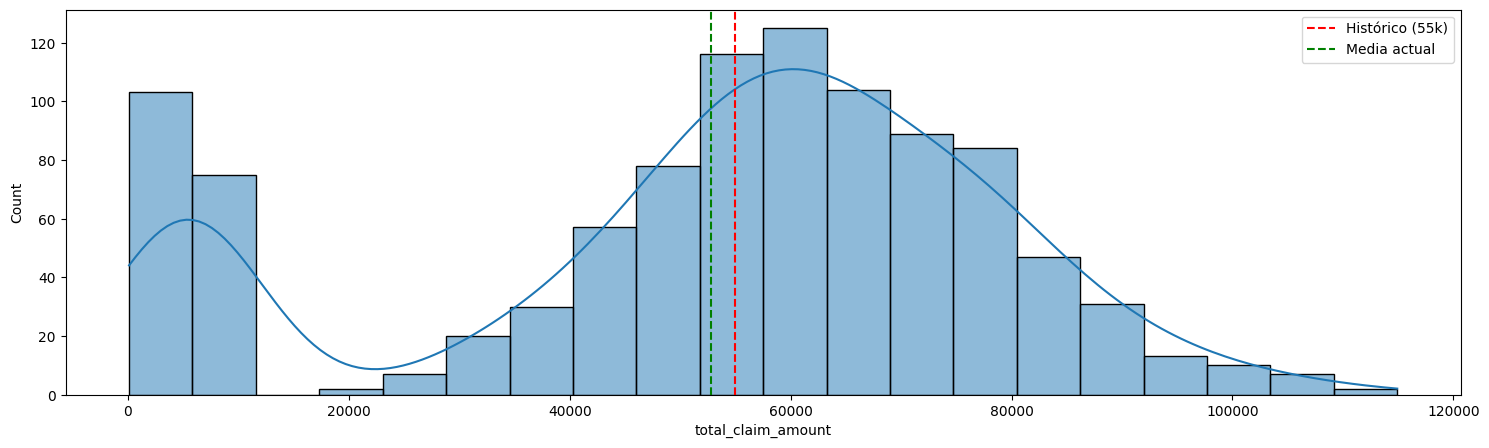

In [11]:
# Gr√°fico r√°pido
plt.figure(figsize=(18,5))
sns.histplot(y, kde=True)
plt.axvline(mu_hist, ls="--", color="red", label="Hist√≥rico (55k)")
plt.axvline(media, ls="--", color="green",  label="Media actual")
plt.legend()
plt.show()

## Caso 2 ¬∑ 2 grupos independientes (fraude vs no fraude)

**Pregunta pr√°ctica:**  
¬øLos siniestros marcados como fraude tienen un coste medio distinto de los siniestros normales?

**Variables usadas:**
- `fraud_reported`: "Y" (fraude reportado) vs "N" (no fraude).
- `total_claim_amount`: importe econ√≥mico.

**Hip√≥tesis estad√≠sticas:**
- H‚ÇÄ: Œº_fraude = Œº_no_fraude  
  ‚Üí el coste medio es el mismo.
- H‚ÇÅ: Œº_fraude ‚â† Œº_no_fraude  
  ‚Üí el fraude est√° asociado a distinta severidad econ√≥mica.

Usamos el test t de Welch (`equal_var=False`) porque no asumimos varianzas iguales entre grupos.

**Qu√© vamos a mirar:**
1. La media de ambos grupos (Y vs N).
2. El p-value del test.
3. Un boxplot comparando distribuciones / colas largas.


In [15]:
# --- t-test de dos muestras: fraude vs. no fraude ---
fraude = claims.loc[claims["fraud_reported"]== "Y", "total_claim_amount"].dropna()
no_fraude = claims.loc[claims["fraud_reported"]== "N", "total_claim_amount"].dropna()

# prueba t de Welch (no asume varianzas iguales)

t, p = stats.ttest_ind(fraude, no_fraude, equal_var=False)



Media con FRAUDE USD: 60302.10526315789
Media sin FRAUDE USD: 50288.605577689246
t = 6.035779676158822
p-value = 2.9011333511514786e-09


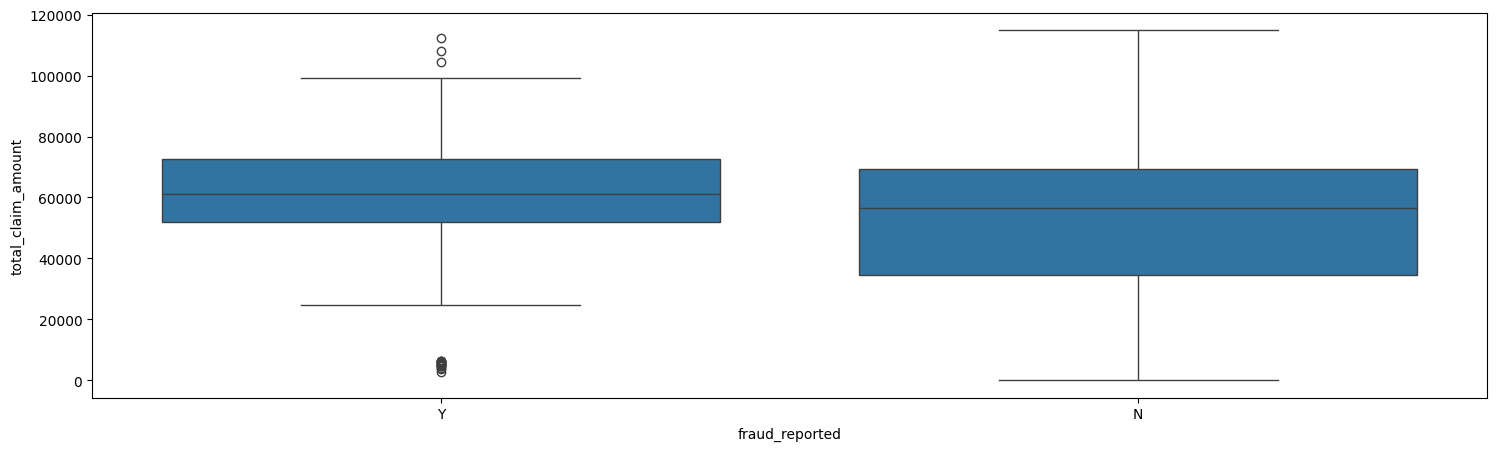

In [19]:
# 3. Resultados b√°sicos
print("Media con FRAUDE USD:", fraude.mean())
print("Media sin FRAUDE USD:", no_fraude.mean())
print("t =", t)
print("p-value =",p)

# 4. Gr√°fico de comparaci√≥n
plt.figure(figsize=(18,5))
sns.boxplot(x="fraud_reported", y="total_claim_amount", data=claims)
plt.show()


In [20]:
10000/50289

0.19885064328183102

## Caso 3 ¬∑ Mismo grupo medido dos veces (t-test pareado)

**Pregunta pr√°ctica:**  
¬øEstamos estimando bien el coste del siniestro cuando se abre el parte, o sistem√°ticamente acabamos pagando m√°s de lo que dijimos al inicio?

Esta es una pregunta de reservas: ¬ønuestras reservas iniciales est√°n sesgadas?

Ejemplo t√≠pico (conceptual, porque este dataset no trae ambas columnas):
- `initial_estimate`: lo que el tramitador reserva inicialmente.
- `final_paid`: lo que finalmente se paga.

**Hip√≥tesis estad√≠sticas:**
- H‚ÇÄ: media(final_paid - initial_estimate) = 0  
  ‚Üí no hay sesgo sistem√°tico (en promedio acertamos).
- H‚ÇÅ: media(...) ‚â† 0  
  ‚Üí sesgo: o infravaloramos (peligroso) o sobrevaloramos (capital inmovilizado).

**Por qu√© es cr√≠tico actuarialmente:**
- Si estamos subestimando consistentemente, las reservas t√©cnicas est√°n por debajo de lo necesario ‚Üí riesgo financiero.
- Si estamos sobrestimando siempre, estamos atando capital de manera ineficiente.

En esta celda generamos un ejemplo sint√©tico solo para ilustrar el m√©todo y el gr√°fico.

**Nota:**  
> El dataset `insurance_claims.csv` no contiene informaci√≥n de reservas iniciales ni pagos finales.  
> En este ejemplo se **simulan valores hipot√©ticos** para ilustrar c√≥mo se aplicar√≠a un **T-test pareado** en la pr√°ctica actuarial, comparando estimaciones iniciales vs pagos reales.

In [36]:
np.random.seed(42)

n=200

estimado_inicial = np.random.normal(52000, 8000, n)
pago_final = estimado_inicial + np.random.normal(2000, 5000, n) #el pago final tiende a ser algo mayor que la estimaci√≥n inicial

t_stat, p_val = stats.ttest_rel(estimado_inicial, pago_final)



In [37]:
p_val

np.float64(4.7729470996322586e-11)

Media estimada inicial: 51673.83227862332
Media pagada final: 54103.1732131177
t = -6.961689223129775
p-value 4.7729470996322586e-11


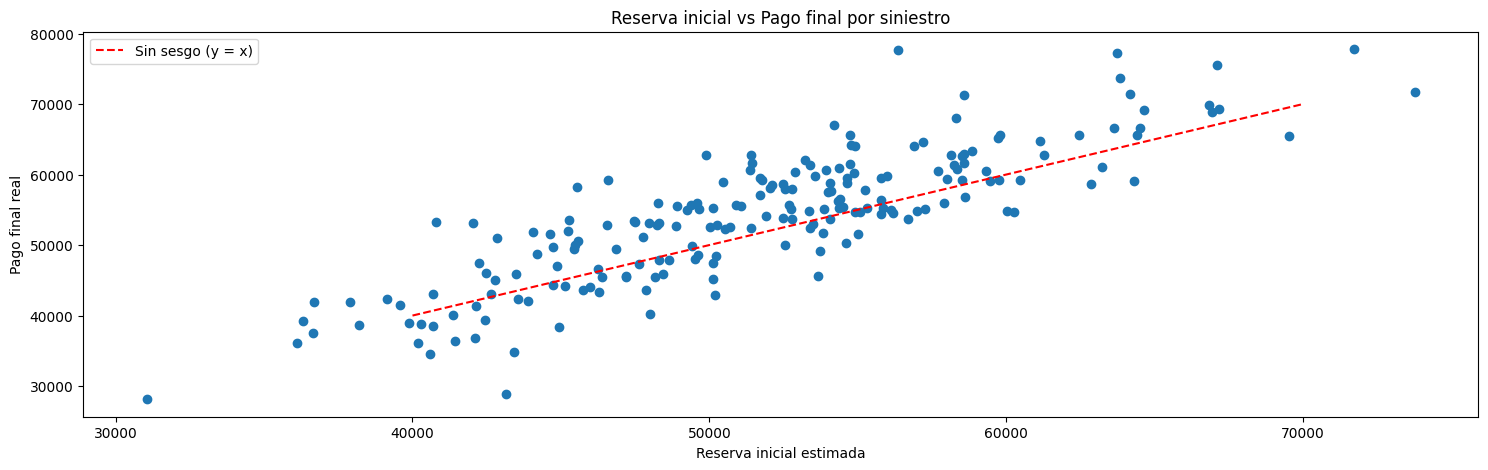

In [38]:
print("Media estimada inicial:", estimado_inicial.mean())
print("Media pagada final:", pago_final.mean())
print("t =", t_stat)
print("p-value", p_val)

# Visual: cada punto es un siniestro, comparo estimaci√≥n inicial vs pago final
plt.figure(figsize=(18,5))
plt.scatter(estimado_inicial, pago_final)
plt.plot([40000,70000],[40000,70000],'r--', label="Sin sesgo (y = x)")
plt.xlabel("Reserva inicial estimada")
plt.ylabel("Pago final real")
plt.title("Reserva inicial vs Pago final por siniestro")
plt.legend()
plt.show()


## Caso 4 ¬∑ 3 o m√°s grupos (ANOVA)

**Pregunta pr√°ctica:**  
¬øLas distintas categor√≠as de severidad del siniestro tienen realmente costes distintos?

Ejemplo real:
- `incident_severity` puede tomar valores tipo "Minor Damage", "Major Damage", "Total Loss", etc.
- `total_claim_amount` es el importe reclamado.

Queremos comprobar si la severidad que asigna el sistema/perito est√° asociada a diferencias REALES de severidad econ√≥mica.

**Hip√≥tesis estad√≠sticas:**
- H‚ÇÄ: todas las medias de coste son iguales entre categor√≠as.
- H‚ÇÅ: al menos una categor√≠a tiene una media distinta.

**Interpretaci√≥n actuarial:**
- Si rechazamos H‚ÇÄ (p < 0.05), esas etiquetas de severidad no son cosm√©ticas: predicen dinero.
  Eso justifica:
  - circuitos de gesti√≥n distintos,
  - m√°s reserva inicial para ciertas severidades,
  - rutas de liquidaci√≥n m√°s √°giles para da√±os leves.

Tambi√©n acompa√±amos con un boxplot para ver qu√© categor√≠a es la m√°s cara.


In [43]:
# Preparar los grupos por severidad
minor = claims[claims["incident_severity"]=="Minor Damage"]["total_claim_amount"]
major = claims[claims["incident_severity"]=="Major Damage"]["total_claim_amount"]
total = claims[claims["incident_severity"]=="Total Loss"]["total_claim_amount"]
trivial = claims[claims["incident_severity"]=="Trivial Damage"]["total_claim_amount"]

grupos = [minor, major, total, trivial]

F_stat, p_val = stats.f_oneway(*grupos)

In [44]:
F_stat

np.float64(208.1276347966056)

In [45]:
p_val

np.float64(8.680910488995836e-105)

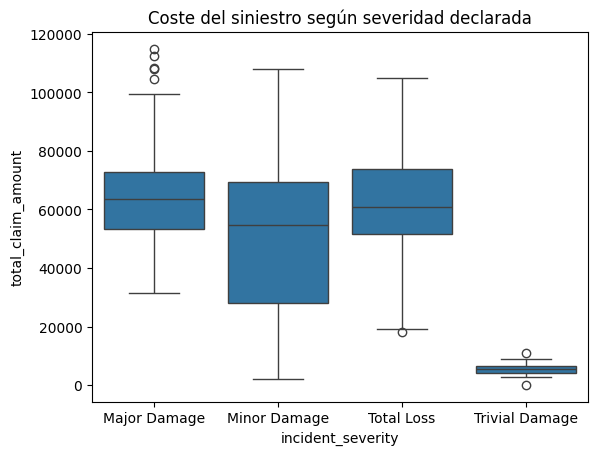

In [46]:
# Visualizaci√≥n: boxplot por severidad declarada
sns.boxplot(
    x="incident_severity",
    y="total_claim_amount",
    data=claims
)
plt.title("Coste del siniestro seg√∫n severidad declarada")
plt.show()


## Caso 5 ¬∑ 2 variables num√©ricas (Correlaci√≥n de Pearson)

¬øLas p√≥lizas con **mayor prima anual** tienden a presentar **siniestros m√°s costosos**?

- Si la **prima anual (`policy_annual_premium`)** refleja adecuadamente el nivel de riesgo del asegurado (tipo de veh√≠culo, cobertura, perfil del conductor, etc.), deber√≠amos observar que las p√≥lizas con primas m√°s altas tambi√©n presentan **siniestros m√°s severos (`total_claim_amount`)**.
- Si no hay relaci√≥n, puede significar que la **tarificaci√≥n no est√° capturando correctamente la severidad del riesgo** o que otros factores (como el comportamiento del conductor o la regi√≥n) influyen m√°s en los costes.

---

### üìä Hip√≥tesis estad√≠sticas

- **H‚ÇÄ:** œÅ = 0 ‚Üí No existe relaci√≥n lineal entre la prima y el coste del siniestro.  
- **H‚ÇÅ:** œÅ ‚â† 0 ‚Üí Existe una relaci√≥n lineal significativa.

---

### üìà Qu√© vamos a analizar
1. El **coeficiente de correlaci√≥n de Pearson (r)**, que mide la fuerza y direcci√≥n de la relaci√≥n lineal.  
   - r = 1 ‚Üí correlaci√≥n positiva perfecta.  
   - r = -1 ‚Üí correlaci√≥n negativa perfecta.  
   - r ‚âà 0 ‚Üí sin relaci√≥n lineal.
2. El **p-valor**, que nos indica si la correlaci√≥n observada es estad√≠sticamente significativa (p < 0.05).




In [47]:

x = claims["policy_annual_premium"].dropna()
y = claims["total_claim_amount"].dropna()

r, p = stats.pearsonr(x, y)

print("r =", r)
print("p-value =", p)



r = 0.00909372914952806
p-value = 0.77394752110367


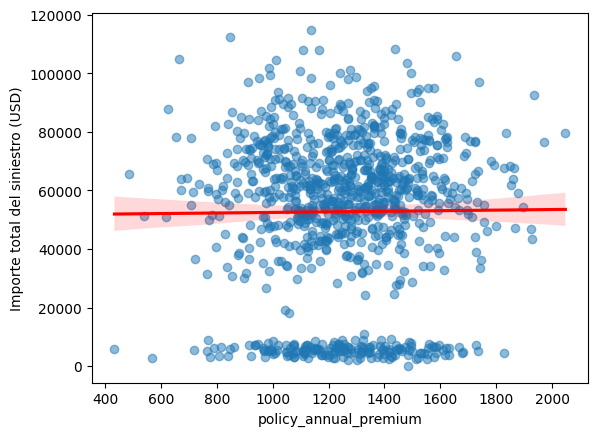

In [48]:
sns.regplot(x=x, y=y, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.ylabel("Importe total del siniestro (USD)")
plt.show()


## Caso 6 ¬∑ 2 variables categ√≥ricas (Chi-cuadrado de independencia)

**Pregunta pr√°ctica:**  
¬øCiertos tipos de incidente aparecen sobrerrepresentados entre los casos marcados como fraude?

Variables:
- `incident_type`: tipo de incidente (robo, colisi√≥n, da√±o, etc.).
- `fraud_reported`: "Y"/"N".

**Hip√≥tesis estad√≠sticas:**
- H‚ÇÄ: `incident_type` y `fraud_reported` son independientes.  
  (El tipo de incidente no tiene nada que ver con que se marque fraude.)
- H‚ÇÅ: hay asociaci√≥n entre ambas variables.  
  (Algunos tipos de incidente concentran m√°s fraude del que esperar√≠amos por azar.)

Usamos Chi-cuadrado de independencia sobre la tabla de contingencia.
Tambi√©n mostramos un mapa de calor (heatmap) con frecuencias observadas.


In [50]:
tabla = pd.crosstab(claims["incident_type"], claims["fraud_reported"])

# Prueba Chi-cuadrado
chi2, p, dof, expected = stats.chi2_contingency(tabla)

# Resultados
print("Tabla de contingencia:")
print(tabla)
print()
print("Chi¬≤ =", chi2)
print("Grados de libertad =", dof)
print("p-value =", p)


Tabla de contingencia:
fraud_reported              N    Y
incident_type                     
Multi-vehicle Collision   305  114
Parked Car                 76    8
Single Vehicle Collision  286  117
Vehicle Theft              86    8

Chi¬≤ = 29.131539725752873
Grados de libertad = 3
p-value = 2.1013336774786627e-06


In [49]:
tabla = pd.crosstab(claims["incident_type"], claims["fraud_reported"])
tabla

fraud_reported              N    Y
incident_type                     
Multi-vehicle Collision   305  114
Parked Car                 76    8
Single Vehicle Collision  286  117
Vehicle Theft              86    8

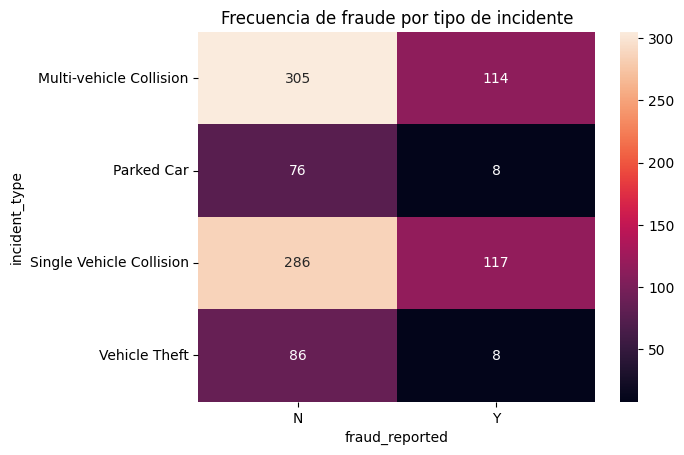

In [51]:

# Gr√°fico
sns.heatmap(tabla, annot=True, fmt="d")
plt.title("Frecuencia de fraude por tipo de incidente")
plt.show()

s√≠ hay evidencia estad√≠stica muy fuerte de que
el tipo de incidente est√° relacionado con la ocurrencia de fraude.

# Conclusiones globales

- **Caso 1 (1 grupo vs valor hist√≥rico):**
  Sirve para decir si el nivel de severidad promedio ha cambiado respecto a lo que la compa√±√≠a asum√≠a como "normal". Impacta primas y reservas.

- **Caso 2 (2 grupos independientes):**
  Compara fraude vs no fraude. Si hay diferencia significativa en el coste medio, tienes base para priorizar control antifraude.

- **Caso 3 (mismo siniestro en dos momentos):**
  Detecta sesgo sistem√°tico en las reservas iniciales. Es control t√©cnico puro: ¬øestamos subestimando o sobreestimando consistentemente?

- **Caso 4 (3+ grupos, ANOVA):**
  Valida si la clasificaci√≥n de severidad del siniestro tiene sentido econ√≥mico real. Si s√≠, justifica circuitos de gesti√≥n diferenciados.

- **Caso 5 (2 num√©ricas, correlaci√≥n):**
  Te dice si la complejidad f√≠sica del siniestro explica el importe. √ötil para variables explicativas en modelos de severidad.

- **Caso 6 (2 categ√≥ricas, chi-cuadrado):**
  Te dice si hay patrones de fraude asociados a ciertos tipos de incidente. Esto es munici√≥n directa para equipos antifraude.

